In [21]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import missingno as msno
import seaborn as sns 
import matplotlib.pyplot as plt 


pd.pandas.set_option("display.max_columns",None)

In [22]:
#load data 
def load_CKD_data():
   df =pd.read_csv(r'C:\Users\Hiba\Desktop\EC449\Datasets\ckd.csv')
   return df



## Exploaring Dataset 

In [23]:
ckd_data = load_CKD_data()
ckd_data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
#summurey of each numrical values 
ckd_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [25]:
#drop id coulmn there is no need to it 
ckd_data.drop('id', axis = 1, inplace = True)

In [26]:
#Rename Features 

ckd_data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classification']

ckd_data[1:10]


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


<function matplotlib.pyplot.show(close=None, block=None)>

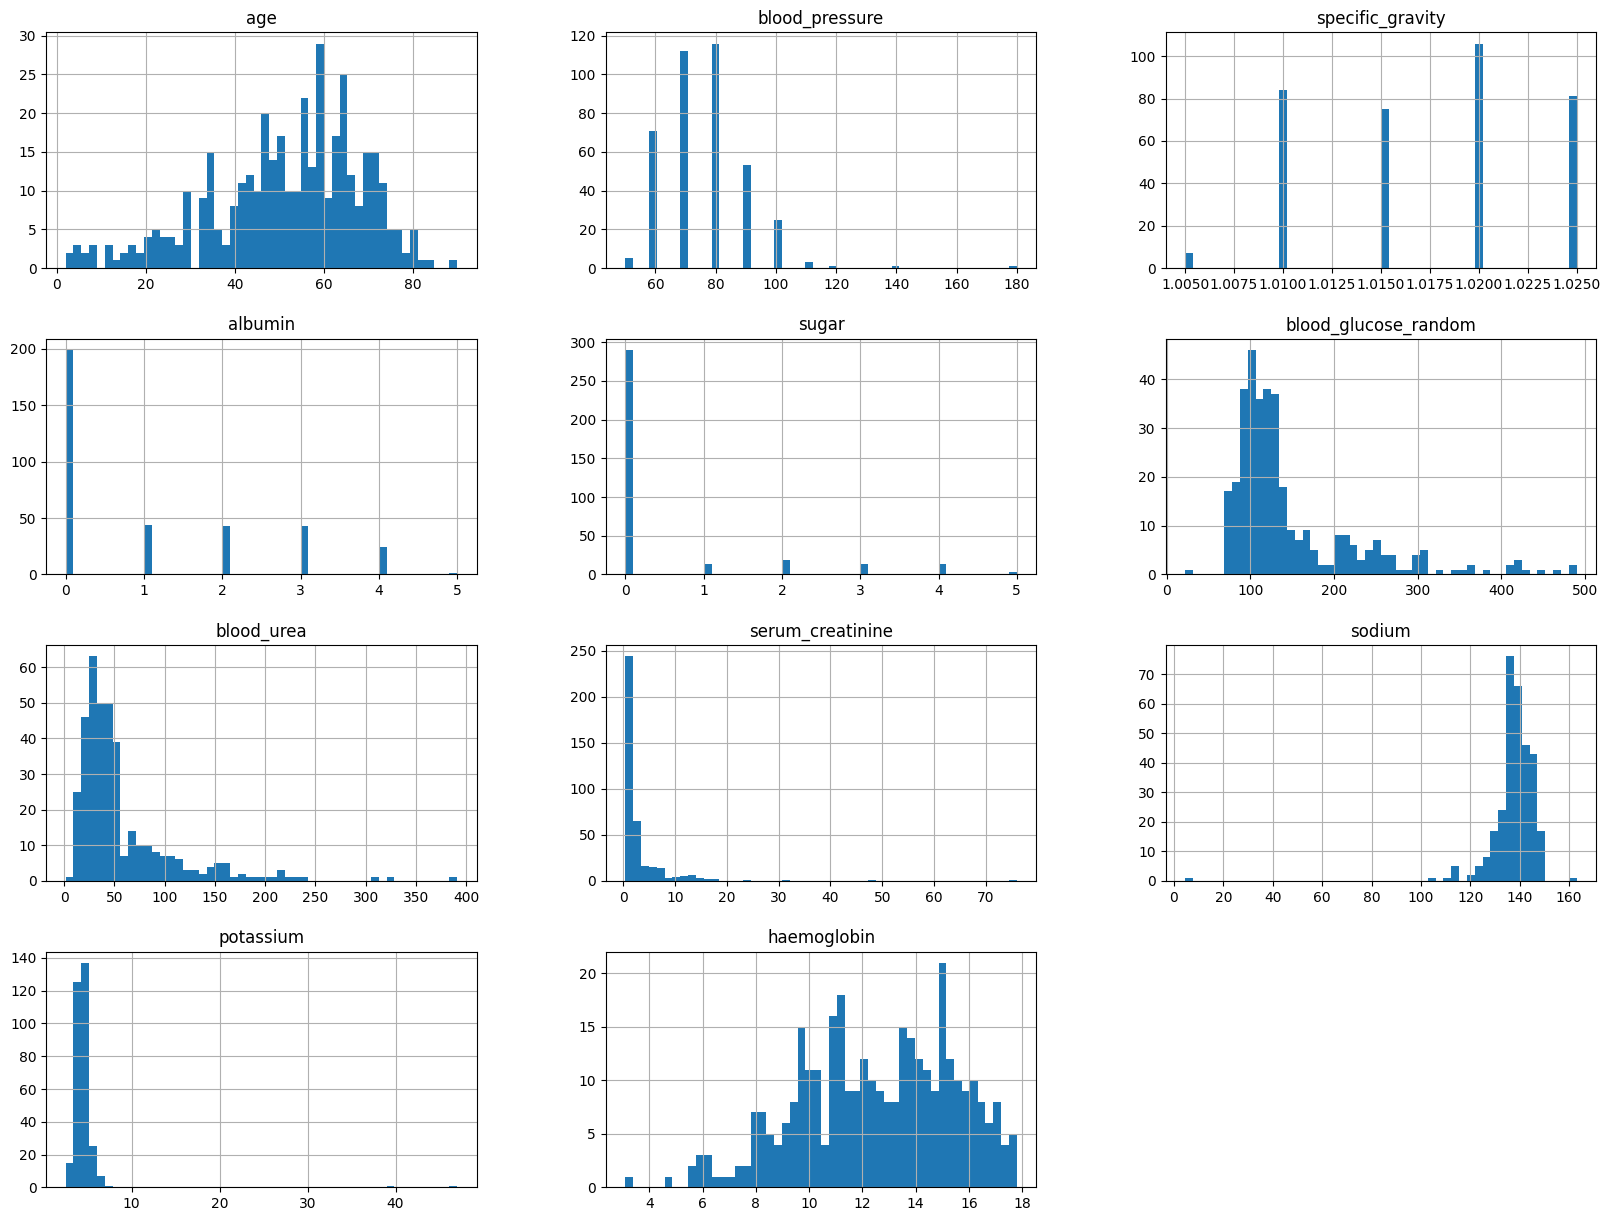

In [27]:
#plot histogram for every attribute 

%matplotlib inline
ckd_data.hist(bins = 50, figsize=(20,15))
plt.show



In [28]:
#information about datasets as non-null values and datatypes
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [29]:
ckd_data.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64

<AxesSubplot: >

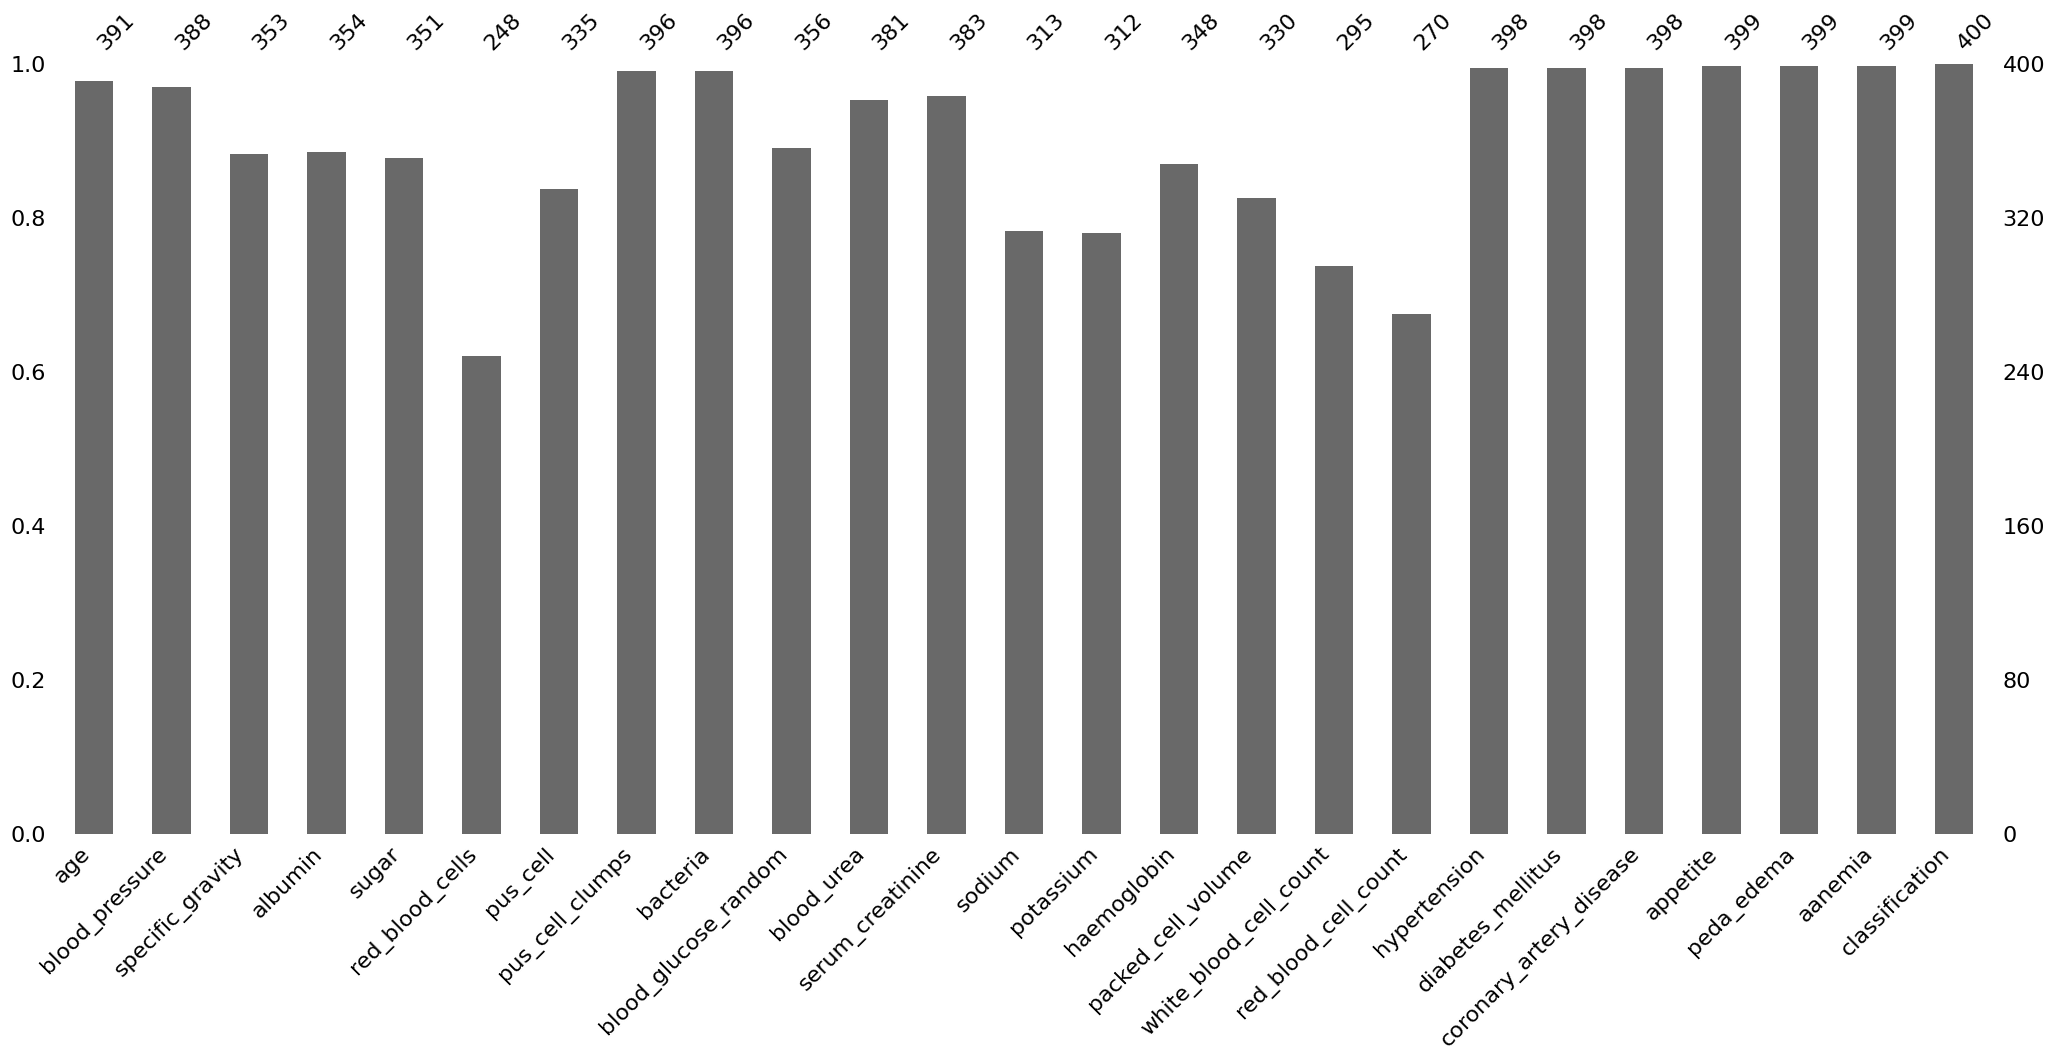

In [30]:
msno.bar(ckd_data)

<AxesSubplot: >

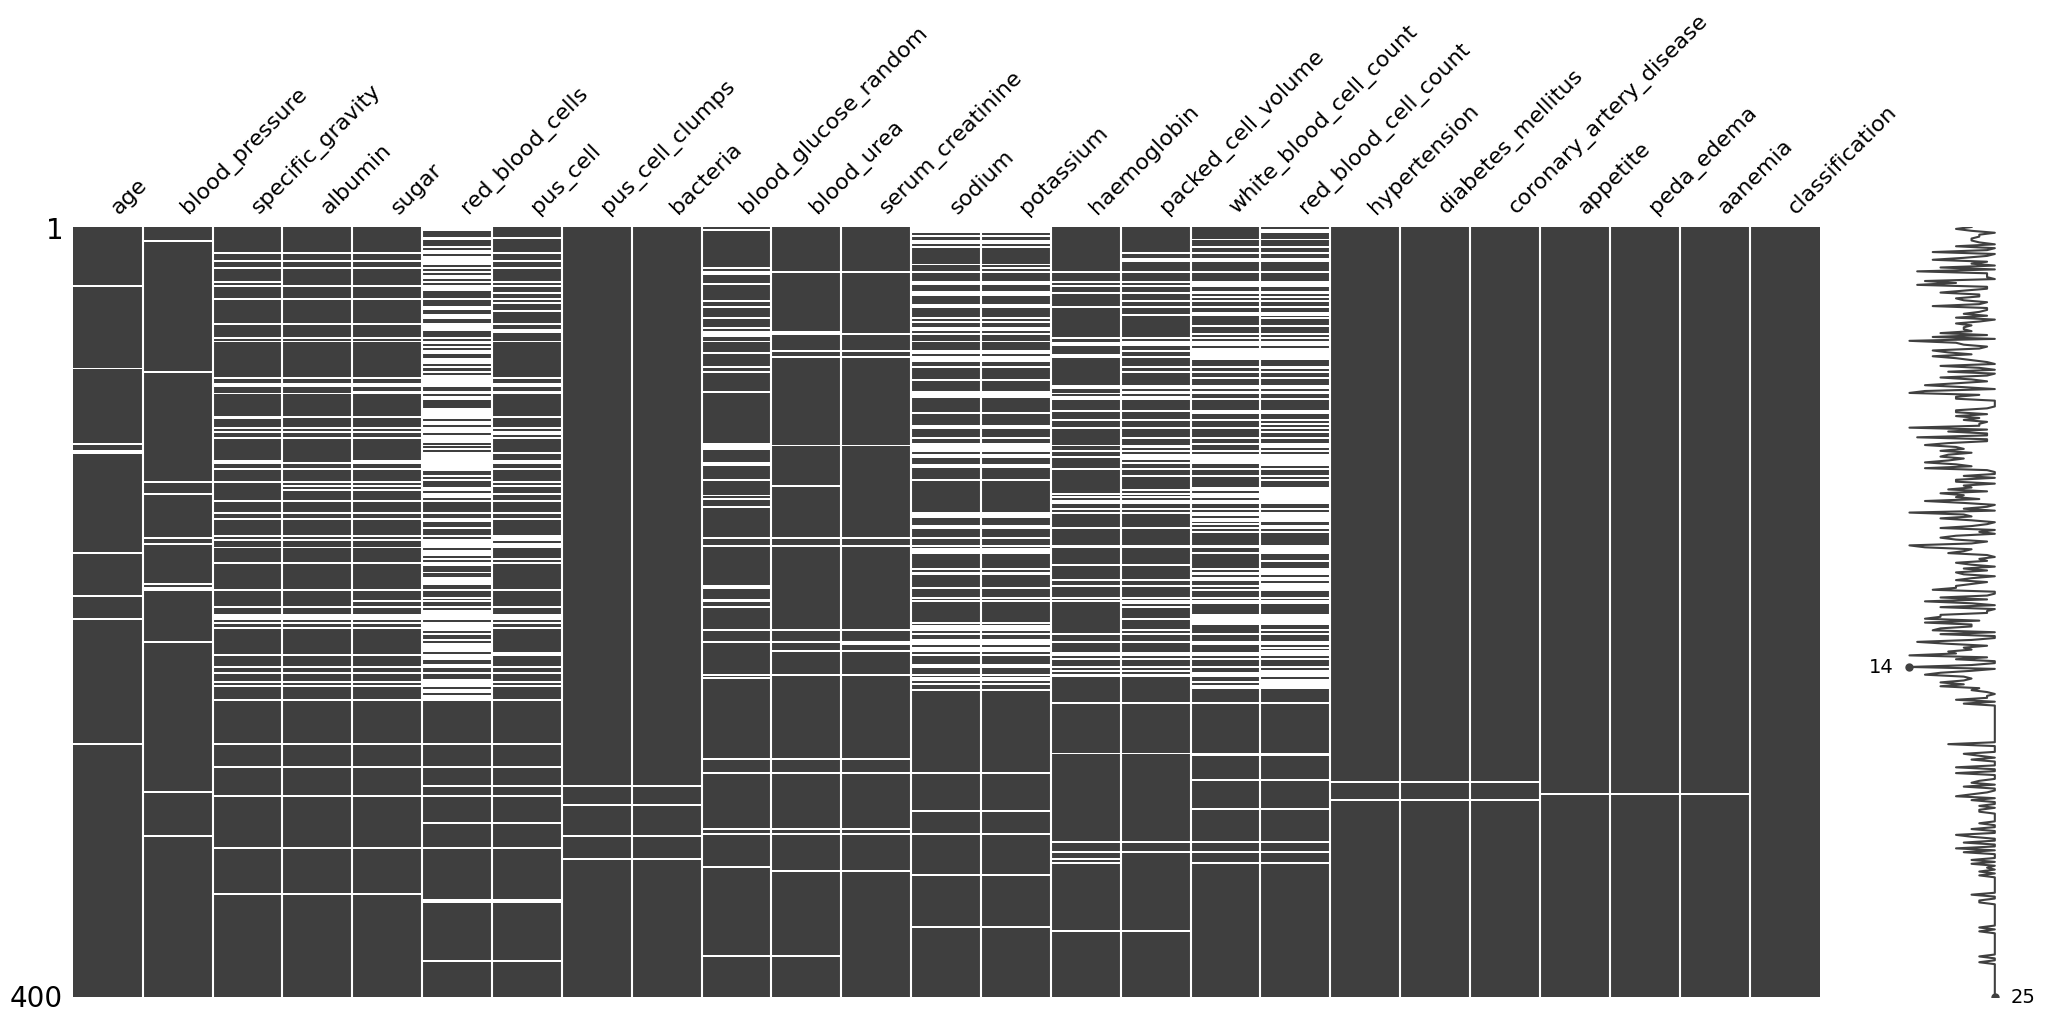

In [31]:
msno.matrix(ckd_data)

<AxesSubplot: >

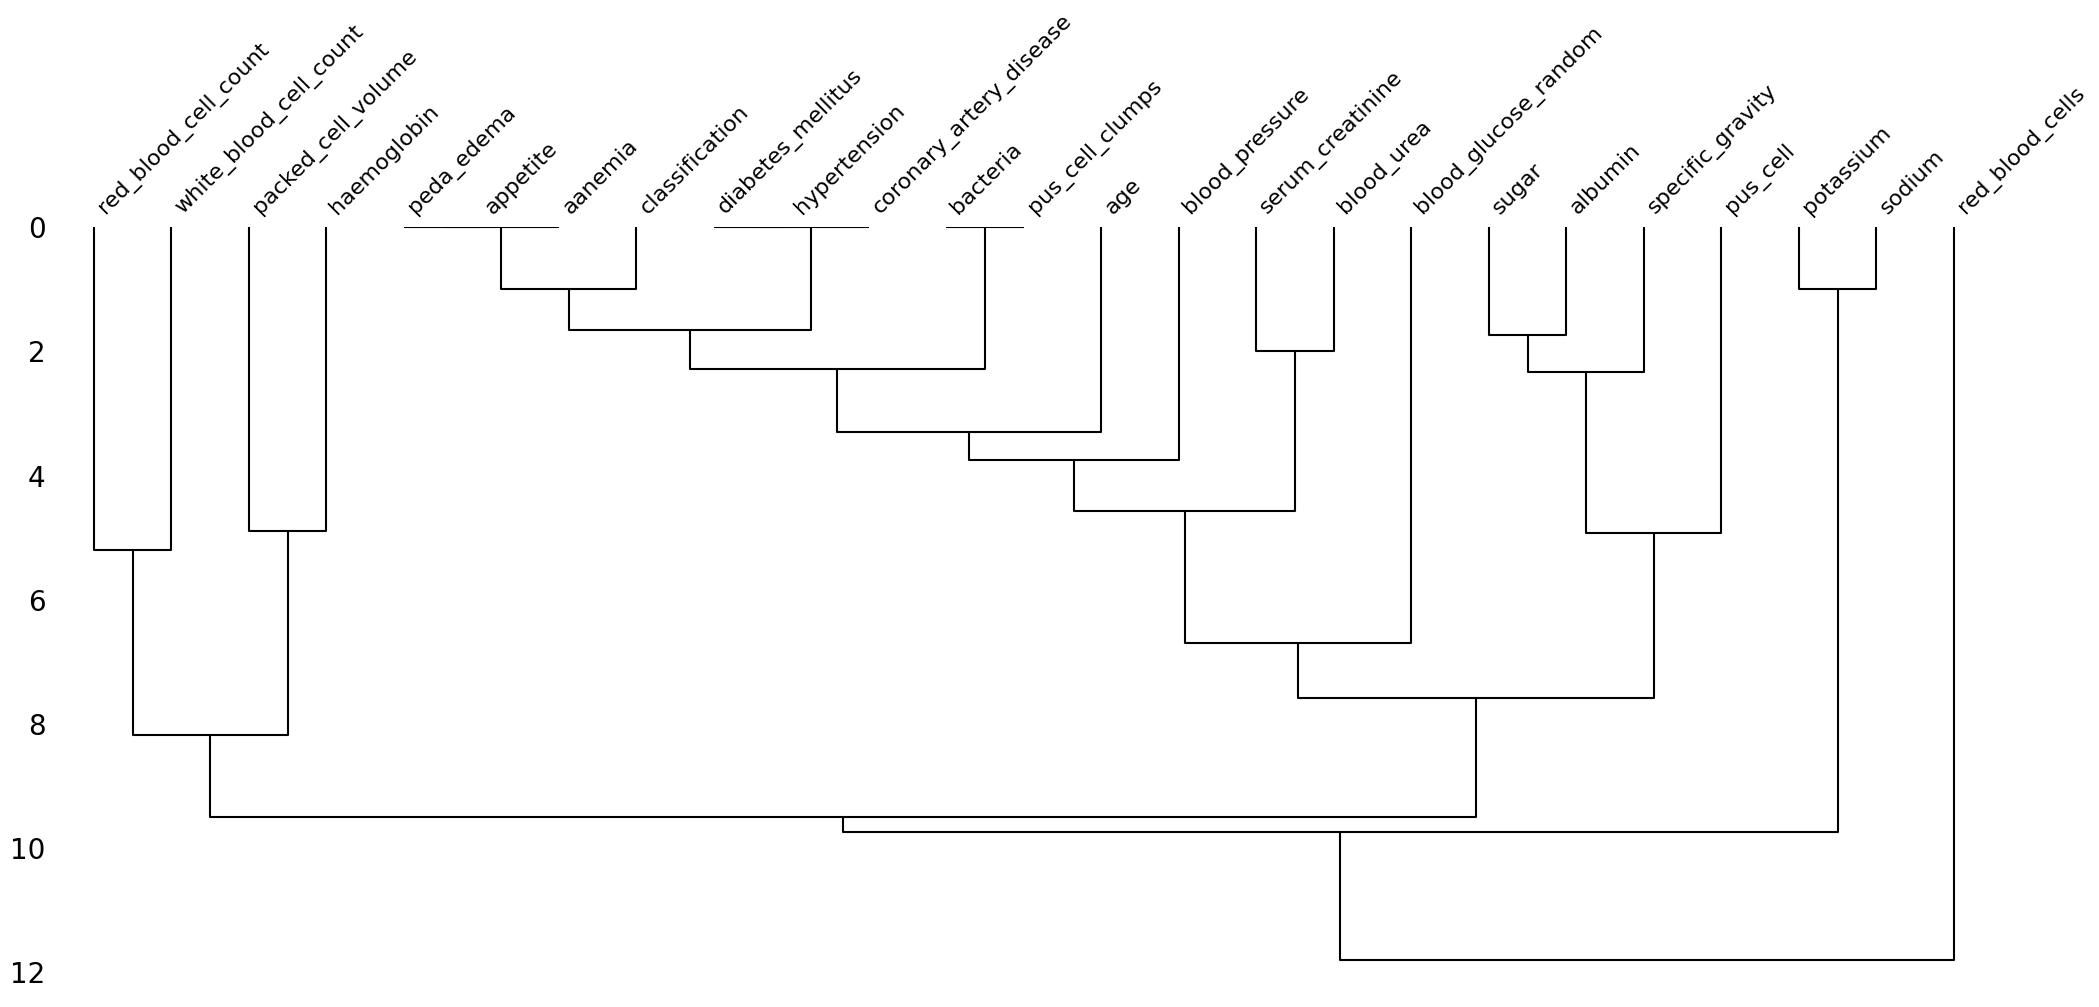

In [32]:
msno.dendrogram(ckd_data)


## Cleaning Data

In [33]:
#Identify Columns That Contain a Single Value
print(ckd_data.nunique())

age                         76
blood_pressure              10
specific_gravity             5
albumin                      6
sugar                        6
red_blood_cells              2
pus_cell                     2
pus_cell_clumps              2
bacteria                     2
blood_glucose_random       146
blood_urea                 118
serum_creatinine            84
sodium                      34
potassium                   40
haemoglobin                115
packed_cell_volume          44
white_blood_cell_count      92
red_blood_cell_count        49
hypertension                 2
diabetes_mellitus            5
coronary_artery_disease      3
appetite                     2
peda_edema                   2
aanemia                      2
classification               3
dtype: int64


In [34]:
ckd_data["diabetes_mellitus"].replace(to_replace={" yes": "yes", '\tno': "no", "\tyes": "yes"}, inplace = True)
ckd_data["coronary_artery_disease"].replace(to_replace={'\tno': "no"}, inplace = True)
ckd_data["classification"].replace(to_replace={'notckd': "not ckd","ckd\t": "ckd"}, inplace = True)
ckd_data["classification"].replace(to_replace={'not ckd': 0.0,"ckd": 1}, inplace = True)
ckd_data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [35]:
#turn some object values into numrical 
objtonum = ["packed_cell_volume","white_blood_cell_count", "red_blood_cell_count", "classification"]
for i in objtonum:
    ckd_data[i] = pd.to_numeric(ckd_data[i], errors='coerce')

ckd_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [36]:
#put numrical and textual data in diffreant dataframes 


TARGET = 'classification'
FEATURES = ckd_data.columns.drop(TARGET)

NUM = ckd_data[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUM)}")

CAT = pd.Index(np.setdiff1d(FEATURES, NUM))
print(f"Categorical features: {', '.join(CAT)}")

text_ckd = ckd_data.select_dtypes(include=object)
num_ckd = ckd_data.select_dtypes(include= float)       



Numerical features: age, blood_pressure, specific_gravity, albumin, sugar, blood_glucose_random, blood_urea, serum_creatinine, sodium, potassium, haemoglobin, packed_cell_volume, white_blood_cell_count, red_blood_cell_count
Categorical features: aanemia, appetite, bacteria, coronary_artery_disease, diabetes_mellitus, hypertension, peda_edema, pus_cell, pus_cell_clumps, red_blood_cells


unique valuse in red_blood_cells are [nan 'normal' 'abnormal']
unique valuse in pus_cell are ['normal' 'abnormal' nan]
unique valuse in pus_cell_clumps are ['notpresent' 'present' nan]
unique valuse in bacteria are ['notpresent' 'present' nan]
unique valuse in hypertension are ['yes' 'no' nan]
unique valuse in diabetes_mellitus are ['yes' 'no' ' yes' '\tno' '\tyes' nan]
unique valuse in coronary_artery_disease are ['no' 'yes' '\tno' nan]
unique valuse in appetite are ['good' 'poor' nan]
unique valuse in peda_edema are ['no' 'yes' nan]
unique valuse in aanemia are ['no' 'yes' nan]
unique valuse in classification are ['ckd' 'ckd\t' 'notckd']


In [37]:
#cheak for unique values in cat data 
for col in text_ckd:
   print(f'unique valuse in {col} are {text_ckd[col].unique()}')


unique valuse in red_blood_cells are [nan 'normal' 'abnormal']
unique valuse in pus_cell are ['normal' 'abnormal' nan]
unique valuse in pus_cell_clumps are ['notpresent' 'present' nan]
unique valuse in bacteria are ['notpresent' 'present' nan]
unique valuse in hypertension are ['yes' 'no' nan]
unique valuse in diabetes_mellitus are ['yes' 'no' nan]
unique valuse in coronary_artery_disease are ['no' 'yes' nan]
unique valuse in appetite are ['good' 'poor' nan]
unique valuse in peda_edema are ['no' 'yes' nan]
unique valuse in aanemia are ['no' 'yes' nan]


In [35]:
#check for unique values in num data 
for col in num_ckd:
   print(f'unique valuse in {col} are {num_ckd[col].unique()}')

unique valuse in age are [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique valuse in blood_pressure are [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique valuse in specific_gravity are [1.02  1.01  1.005 1.015   nan 1.025]
unique valuse in albumin are [ 1.  4.  2.  3.  0. nan  5.]
unique valuse in sugar are [ 0.  3.  4.  1. nan  2.  5.]
unique valuse in blood_glucose_random are [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210.

In [38]:
#number of null values in the whole dataset
ckd_data.isnull().sum().sum()

1012

In [39]:
# calculate duplicates
dups = ckd_data.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(ckd_data[dups])

False
Empty DataFrame
Columns: [age, blood_pressure, specific_gravity, albumin, sugar, red_blood_cells, pus_cell, pus_cell_clumps, bacteria, blood_glucose_random, blood_urea, serum_creatinine, sodium, potassium, haemoglobin, packed_cell_volume, white_blood_cell_count, red_blood_cell_count, hypertension, diabetes_mellitus, coronary_artery_disease, appetite, peda_edema, aanemia, classification]
Index: []


In [21]:

# sns.pairplot(ckd_data, kind="scatter", hue="classification", palette="Set2")
# plt.show()


## Pre-processing Data

In [48]:
#specify input and target and drop id 
inputs = [col for col in ckd_data.columns if col not in ['classification'] ]

target = ["classification"]

In [49]:
# assign X, y to dataframe 
X = ckd_data[inputs]
y = ckd_data[target]

X.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


In [50]:
#test/train split 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 240, stratify = y)



ValueError: Input y contains NaN.

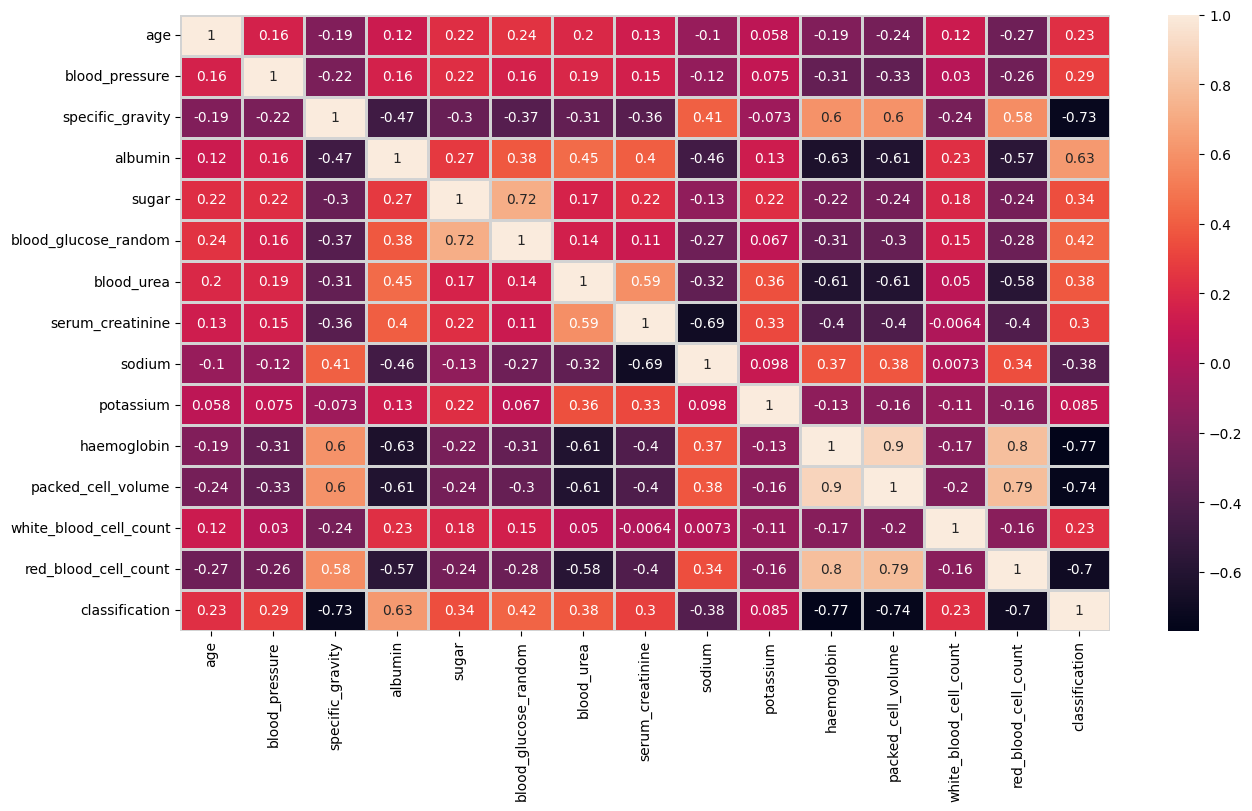

In [40]:

plt.figure(figsize = (15, 8))

sns.heatmap(num_ckd.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

numerical_pipe = Pipeline([
    ('imputer', IterativeImputer()),
    
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUM),
    ('cat', categorical_pipe, CAT)
])

pipe = Pipeline([
('preprocessors', preprocessors),
('model', GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
)])
pipe = pipe.fit(X_train, y_train)
    



c:\Python39\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score



def calculate_roc_auc(model_pipe, X, y):
    """Calculate roc auc score. 
    
    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    y_proba = model_pipe.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba)
  


In [30]:
def calculate_accuracy(model_pipe, X, y):
    """Calculate roc auc score. 
    
    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    y_proba = model_pipe.predict(X)
    return accuracy_score(y, y_proba)
  

In [35]:
print(f"Test Accuracy : {calculate_accuracy(pipe, X_test, y_test):.9f}")

Test Accuracy : 1.000000000


In [36]:
print(f"Train Accuracy: {calculate_accuracy(pipe, X_train, y_train):.9f}")

print(f"Test Accuracy: {calculate_accuracy(pipe, X_test, y_test):.9f}")


Train Accuracy: 1.000000000
Test Accuracy: 1.000000000


In [37]:
print(f"Train ROC-AUC: {calculate_roc_auc(pipe, X_train, y_train):.4f}")

print(f"Test ROC-AUC: {calculate_roc_auc(pipe, X_test, y_test):.4f}")


Train ROC-AUC: 1.0000
Test ROC-AUC: 1.0000


In [312]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder


num_imputer = IterativeImputer()
train_num_imputed = num_imputer.fit_transform(X_train[NUM])

scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(train_num_imputed)

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
train_cat_imputed = cat_imputer.fit_transform(X_train[CAT])

encoder = OrdinalEncoder(drop='first', handle_unknown='ignore', sparse=False)
train_cat_encoded = encoder.fit_transform(train_cat_imputed)


train_preprocessed = np.concatenate((train_num_scaled, train_cat_encoded), axis=1)

columns = np.append(NUM, encoder.get_feature_names_out(CAT))
pd.DataFrame(train_preprocessed, columns=columns, index=X_train.index).head()



,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,aanemia_no,aanemia_yes,appetite_missing,appetite_poor,bacteria_notpresent,bacteria_present,coronary_artery_disease_no,coronary_artery_disease_yes,diabetes_mellitus_no,diabetes_mellitus_yes,hypertension_no,hypertension_yes,peda_edema_no,peda_edema_yes,pus_cell_missing,pus_cell_normal,pus_cell_clumps_notpresent,pus_cell_clumps_present,red_blood_cells_missing,red_blood_cells_normal
78,0.772727,0.230769,0.641646,0.262416,0.332801,0.414023,0.240385,0.041431,0.938144,0.022472,0.476190,0.466667,0.264216,0.278259,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
286,0.784091,0.153846,0.829395,0.013611,0.247261,0.278119,0.025641,0.009829,0.965636,0.056180,0.789116,0.777778,0.314050,0.661017,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
247,0.590909,0.307692,1.000000,0.182601,0.247261,0.399903,0.025641,0.015096,0.931271,0.038202,0.667346,0.680910,0.252564,0.444236,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
143,0.443182,0.230769,0.658790,0.182601,0.849452,0.505803,0.496795,0.236305,0.896907,0.049438,0.574868,0.581630,0.275503,0.330536,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
307,0.511364,0.076923,0.829395,0.013611,0.247261,0.376959,0.022436,0.005879,1.000000,0.022472,0.714286,0.777778,0.235537,0.406780,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


Feature: 0, Score: 0.00667
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.18846
Feature: 3, Score: 0.02577
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.72038
Feature: 11, Score: 0.03891
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00659
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.01322
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000


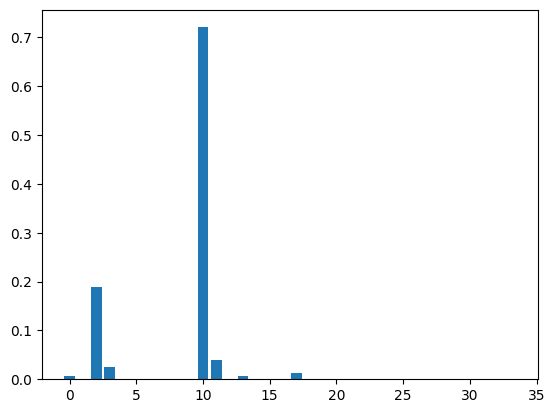

In [313]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(train_preprocessed, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier()
model = model.fit(train_preprocessed, y_train)


c:\Python39\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

In [75]:
test_num_imputed = num_imputer.transform(X_test[NUM])
test_num_scaled = scaler.transform(test_num_imputed)
test_cat_imputed = cat_imputer.transform(X_test[CAT])
test_cat_encoded = encoder.transform(test_cat_imputed)
test_preprocessed = np.concatenate((test_num_scaled, test_cat_encoded), axis=1)


In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k=4)
fs.fit(train_preprocessed, y_train)
X_train_fs = fs.transform(train_preprocessed)
X_test_fs = fs.transform(test_preprocessed)


Feature 0: 1.218569
Feature 1: 2.825999
Feature 2: 7.488270
Feature 3: 30.545776
Feature 4: 6.816674
Feature 5: 5.134561
Feature 6: 5.476484
Feature 7: 3.394968
Feature 8: 0.162900
Feature 9: 0.050858
Feature 10: 10.185556
Feature 11: 9.549056
Feature 12: 0.937666
Feature 13: 8.899549
Feature 14: 4.978765
Feature 15: 29.400000
Feature 16: 1.666667
Feature 17: 37.800000
Feature 18: 0.307295
Feature 19: 11.400000
Feature 20: 1.481481
Feature 21: 18.000000
Feature 22: 29.831447
Feature 23: 63.600000
Feature 24: 42.168866
Feature 25: 72.600000
Feature 26: 7.585641
Feature 27: 35.400000
Feature 28: 11.739130
Feature 29: 25.245714
Feature 30: 2.118945
Feature 31: 22.800000
Feature 32: 52.312821
Feature 33: 68.833735


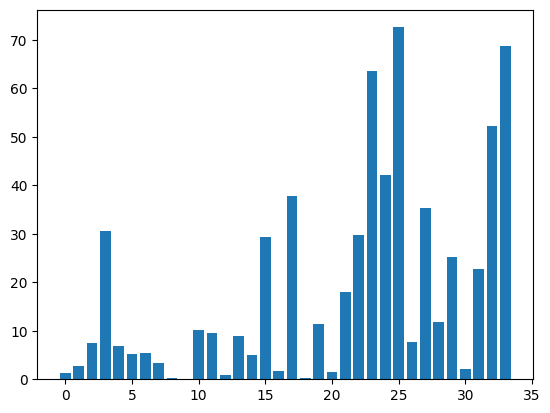

In [34]:
from matplotlib import pyplot

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score



def calculate_roc_auc(model_pipe, X, y):
    """Calculate roc auc score. 
    
    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    y_proba = model_pipe.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba)
  


In [30]:

print(f"Train ROC-AUC: {calculate_roc_auc(pipe, X_train, y_train):.4f}")

print(f"Test ROC-AUC: {calculate_roc_auc(pipe, X_test, y_test):.4f}")


Train ROC-AUC: 1.0000
Test ROC-AUC: 0.9400


In [31]:
import joblib
joblib.dump(pipe , 'model_jlib')

['model_jlib']

In [47]:
X_test.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

In [53]:
m_jlib = joblib.load('model_jlib')
data = {'age': 48, 'blood_pressure':80, 'specific_gravity': 1.02, 'albumin':1, 'sugar':0, 'red_blood_cells': "normal", 'pus_cell':"notpresent",
              'pus_cell_clumps':"notpresent", 'bacteria':121, 'blood_glucose_random':36, 'blood_urea':1.2, 'serum_creatinine':0, 'sodium':0,
              'potassium': 15.4, 'haemoglobin':44, 'packed_cell_volume':7800, 'white_blood_cell_count':5.2, 'red_blood_cell_count':5.2,
              'hypertension':"yes", 'diabetes_mellitus':"yes", 'coronary_artery_disease':"no", 'appetite':"good", 'peda_edema':"no",
              'aanemia':"no" }
c = [48,80,1.02,1,0,0,"normal","notpresent","notpresent",121,36,1.2,0,0,15.4,44,7800,5.2,"yes","yes","no","good","no","no"]

df = pd.DataFrame(data,index = [0])

pipe.predict((df))


#m_jlib.predict() 

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array(['ckd'], dtype=object)

In [59]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [60]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [87]:

X = [48,80,1.02,1,0,0,"normal","notpresent","notpresent",121,36,1.2,0,0,15.4,44,7800,5.2,"yes","yes","no","good","no","no"]





lr.predict(X)

ValueError: could not convert string to float: 'normal'

age, blood_pressure , specific_gravity , albumin, sugar, red_blood_cells , pus_cell,
              pus_cell_clumps, bacteria, blood_glucose_random, blood_urea, serum_creatinine, sodium,
              potassium, haemoglobin, packed_cell_volume, white_blood_cell_count, red_blood_cell_count,
              hypertension, diabetes_mellitus, coronary_artery_disease, appetite, peda_edema,
              aanemia,

In [ ]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=8)

# imputer.fit_transform(ckd_data)

from sklearn.impute import SimpleImputer
import numpy as np 
imputer = SimpleImputer(missing_values= np.nan ,strategy='mean')
imputer.fit(ckd_data)
ckd_data= ckd_data
ckd_data_tran= imputer.transform(ckd_data)


: 

In [ ]:
# # #dealing with missing values 
# # # 1. Replacing Null values with zeros
# # for col in num_ckd:
# #     ckd_data[col] = ckd_data[col].fillna(0)

# #dealing with missing values 
# # 2. Replacing Null values with mean 
# for col in num_ckd:
#     ckd_data[col] = ckd_data[col].fillna(value = ckd_data[col].mean())


: 

In [ ]:
# Simple Imputer 



: 

In [ ]:
#Feature encoding 
# 1. one label encoding????
for col in text_ckd:
    ckd_data[col] = ckd_data[col].astype("category").cat.codes



: 

: 

## Machine Learning

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

: 

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

: 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

: 